<Figure size 432x288 with 0 Axes>

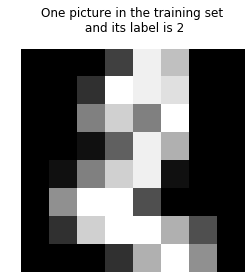

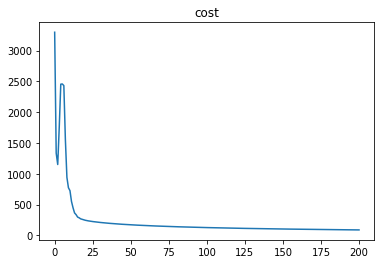

0.8722222222222222

In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#加载数据  1797幅 8x8图像
digits_datas = datasets.load_digits()
X = digits_datas.data
y = digits_datas.target

#显示其中一副图像
plt.figure()
plt.matshow(X[2].reshape(8, 8), cmap='gray')
plt.title('One picture in the training set\n and its label is %i'%(y[2]))
plt.axis('off')
plt.show()

#使用分层采样获得训练集(0.8)和测试集(0.2)
split_index = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
for train_index, test_index in split_index.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
X_train, X_test= X_train.T, X_test.T
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

def initial(tributes_num, output_num, sample_num):
    #param: 属性数  输出类别数 样本数量
    #output: 初始化的参数矩阵
    count = 0
    y_loss_parameters = np.zeros((output_num, sample_num))# 计算损失函数时用到的y矩阵
    for value in y_train:
        y_loss_parameters[value-1, count] = 1
        count += 1
    W = np.random.randn(tributes_num, output_num) / 100
    b = np.zeros((output_num, 1))
    return W, b, y_loss_parameters

def softmax(y_pre_prob):
    #param: 输出层神经元输出矩阵
    #output: softmax函数输出
    return np.exp(y_pre_prob) / np.sum(np.exp(y_pre_prob), axis=0)

def propagate(W, b, X, y_loss_param, learning_rate, num_iteration):
    #param: W, b参数矩阵 训练集矩阵 计算损失时用到的矩阵 学习率 迭代次数
    #output: 迭代后的W参数 cost
    cost = []
    for i in range(num_iteration):
        Z = np.dot(W.T, X) + b 
        A = softmax(Z)
        L = - y_loss_param * np.log(A)
        cost.append(np.sum(L))
        for j in range(X.shape[1]):   # shape[1]为样本数
            A[np.nonzero(y_loss_param[:, j]!=0), j] -= 1
        dw = np.dot(X, A.T)
        db = np.sum(A, axis=1).reshape((10, 1))
        W = W - learning_rate * dw
        b = b - learning_rate * db
    return W, b, cost

def predict(X, W, b):
    #param: 训练集 W参数矩阵
    #output: 预测值
    Z = np.dot(W.T, X) + b
    A = softmax(Z)
    y_predict = np.argmax(A, axis=0) + 1
    return y_predict

W, b, y_loss_param = initial(X_train.shape[0], 10, X_train.shape[1])
W, b, cost = propagate(W, b, X_train, y_loss_param, 0.001, 200)

#绘制cost图像
cost = np.array(cost)
plt.figure()
plt.plot(np.linspace(0, cost.shape, 200), cost)
plt.title('cost')
plt.show()
accuracy_score(y_test, predict(X_test, W, b))